In [1]:
# import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# bet of hands
BET_BANKER = "banker"
BET_PLAYER = "player"
BET_TIE = "tie"

# probability occurance of bet of hands
probability_banker = 46
probability_player = 46
probability_tie = 8
# payout ratio
win_payout = 1
tie_payout = 8
# 5% commission for the house
win_commission = 0.05
# each player's initial balance
initial_balance = 10000000

FIG_WIDTH = 16
FIG_HEIGHT = 10

'''
Two players bet on banker and player respectively with different amount
* 2 players play baccarat
* player 1 bet on banker with excessive amount more than player 2
* player 2 bet on player with way less amount
* the probability settings defined in cell "configuration settings"
* this test aims to evaluate the long term result after many rounds (>1000) of playing
'''


'\nTwo players bet on banker and player respectively with different amount\n* 2 players play baccarat\n* player 1 bet on banker with excessive amount more than player 2\n* player 2 bet on player with way less amount\n* the probability settings defined in cell "configuration settings"\n* this test aims to evaluate the long term result after many rounds (>1000) of playing\n'

In [2]:
class Player:
    def __init__(self, name, balance):
        self.name = name
        self.initial_amount = balance
        self.balance = balance
        self.bet = ""
        self.bet_amount = 0
    def place_bet(self, bet, amount):
        self.bet_hand = bet
        self.bet_amount = amount
    def pay_collect(self, result):
        win_loss = 0
        if self.bet_hand == "":
            # player did not bet, no win nor lose
            pass
        elif result == self.bet_hand:
            # player's bet win
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            elif result == BET_TIE:
                payout = tie_payout
            win = payout * self.bet_amount
            win_loss = win * (1 - win_commission)
        else:
            # player's bet losed
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            else:
                payout = 0
            win_loss = -1 * payout * self.bet_amount
        self.balance += win_loss
        return win_loss

class Baccarat:
    def __init__(self, player, probability_banker, probability_player, probability_tie):
        self.player = player
        self.probability_banker = probability_banker
        self.probability_player = probability_player
        self.probability_tie = probability_tie
        self.balance = 0
        self.bet_record = []
        self.record_index = 0
    def deal(self):
        num_random = random.randrange(0, 100)
        if num_random < self.probability_banker:
            result = BET_BANKER
        elif num_random < (self.probability_banker + self.probability_player):
            result = BET_PLAYER
        else:
            result = BET_TIE
        return result
    def conclude(self, result):
        profitloss = 0
        for i in player:
            win_loss = player[i].pay_collect(result)
            self.bet_record.append({"match": self.record_index, "result": result, "player": player[i].name, "winloss": win_loss})
            profitloss -= win_loss
        self.balance += profitloss
        self.bet_record.append({"match": self.record_index, "result": result, "player": "house", "winloss": profitloss})
        self.record_index += 1
    def print(self):
        print("result player winloss")
        for record in self.bet_record:
            print("{0} {1} {2}".format(record['result'], record['player'], record['winloss']))
    def df(self):
        df = pd.DataFrame.from_dict(self.bet_record)
        return df

def show_result(bet_record_df):
    # plot balanace
    display(HTML('<h3>All players cumulative balance</h3>'))
    df_winloss = bet_record_df[['match', 'player', 'winloss']]
    df = df_winloss.pivot(index=['match'], columns=['player'], values=['winloss'])
    df_cumsum_all = df.cumsum()
    df_cumsum_all.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    plt.show()
    # display(HTML('<h3>House cumulative balance</h3>'))
    # df_cumsum_1 = df_cumsum_all['winloss']['house']
    # df_cumsum_1.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    # plt.show()

    # show statistic
    display(HTML('<h3>Game result statistic</h3>'))
    display(HTML('<h4>Number of matches played</h4>'))
    player_group = bet_record_df.groupby('player')
    num_matches = player_group.get_group('house')['match'].count()
    print(num_matches)
    display(HTML('<h4>Percentage occurence of different result</h4>'))
    print(player_group.get_group('house').value_counts(['result'], normalize=True))
    display(HTML('<h4>Win-Loss after final match</h4>'))
    print(df_cumsum_all['winloss'].iloc[[-1]])
    display(HTML('<h4>Max draw-down</h4>'))
    print(df_cumsum_all['winloss'].min())


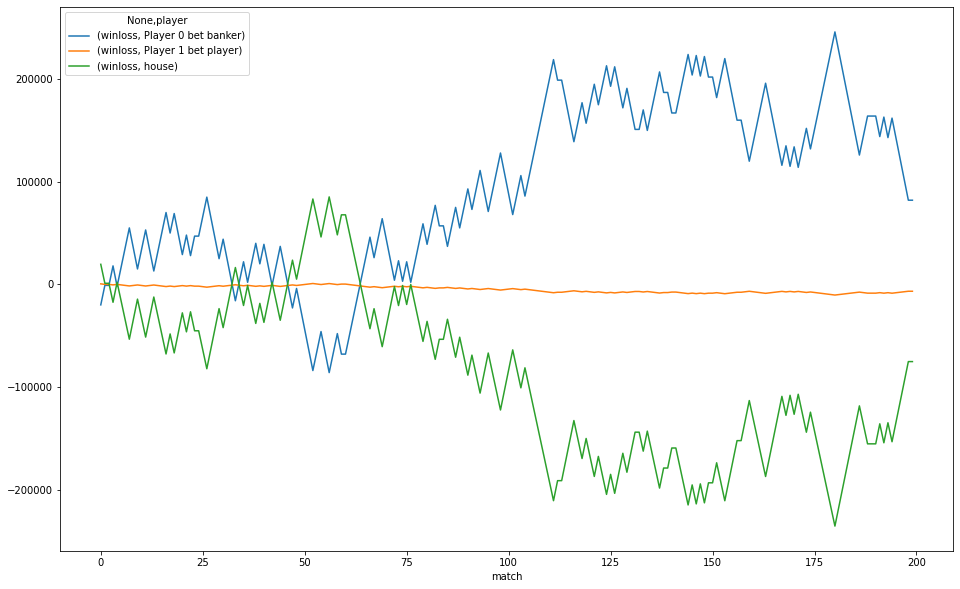

200


result
banker    0.490
player    0.445
tie       0.065
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                 82000.0              -6725.0 -75275.0


player
Player 0 bet banker    -86000.0
Player 1 bet player    -10425.0
house                 -235575.0
dtype: float64


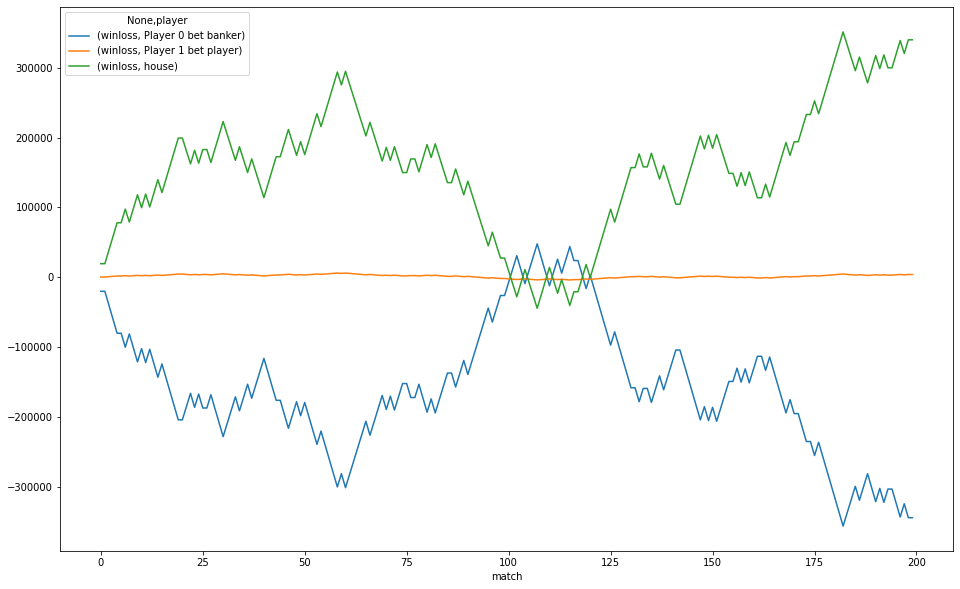

200


result
player    0.485
banker    0.420
tie       0.095
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -344000.0               4075.0  339925.0


player
Player 0 bet banker   -356000.0
Player 1 bet player     -3775.0
house                  -44325.0
dtype: float64


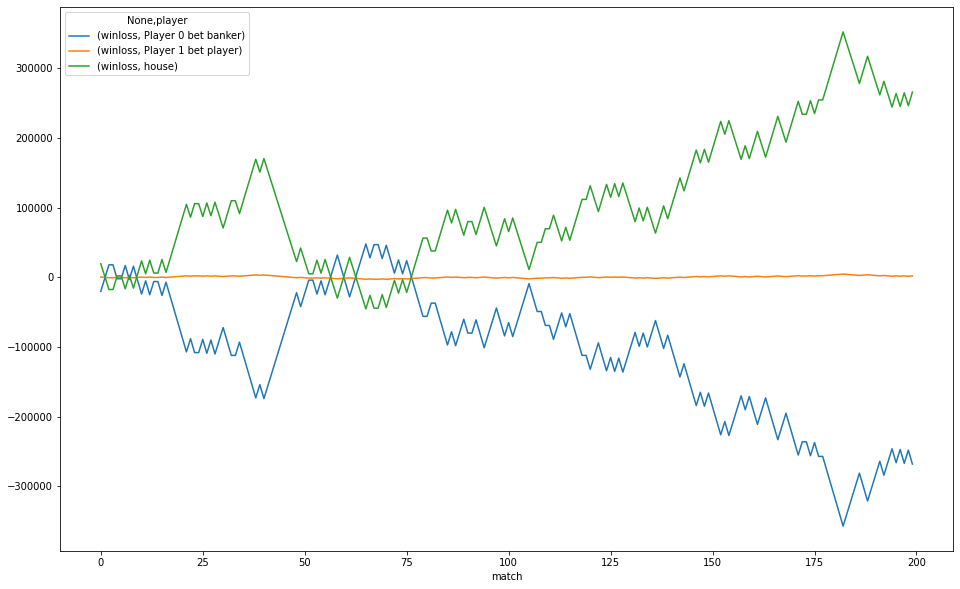

200


result
player    0.485
banker    0.440
tie       0.075
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -268000.0               2075.0  265925.0


player
Player 0 bet banker   -357000.0
Player 1 bet player     -2750.0
house                  -45300.0
dtype: float64


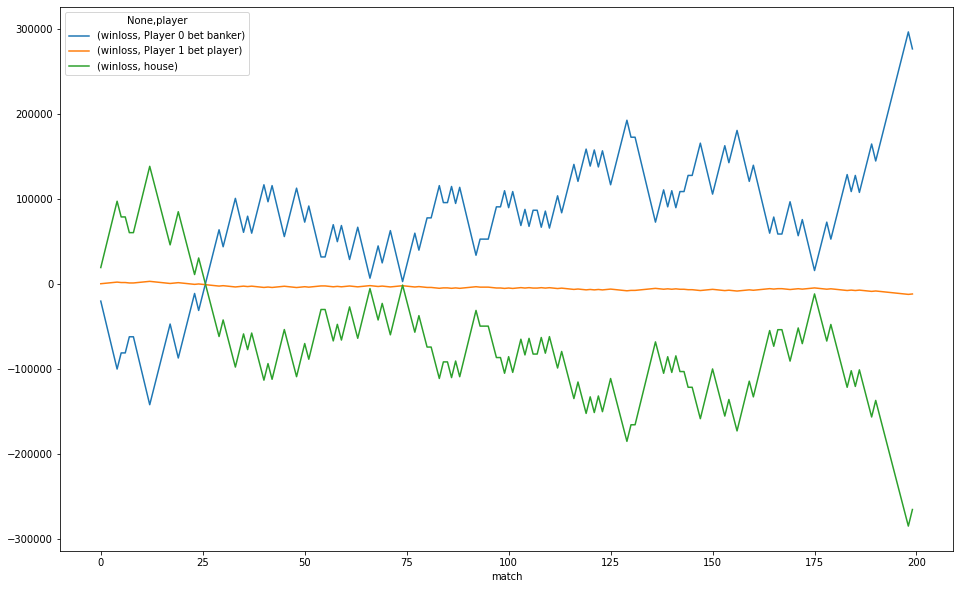

200


result
banker    0.515
player    0.420
tie       0.065
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                277000.0             -11600.0 -265400.0


player
Player 0 bet banker   -142000.0
Player 1 bet player    -12075.0
house                 -284925.0
dtype: float64


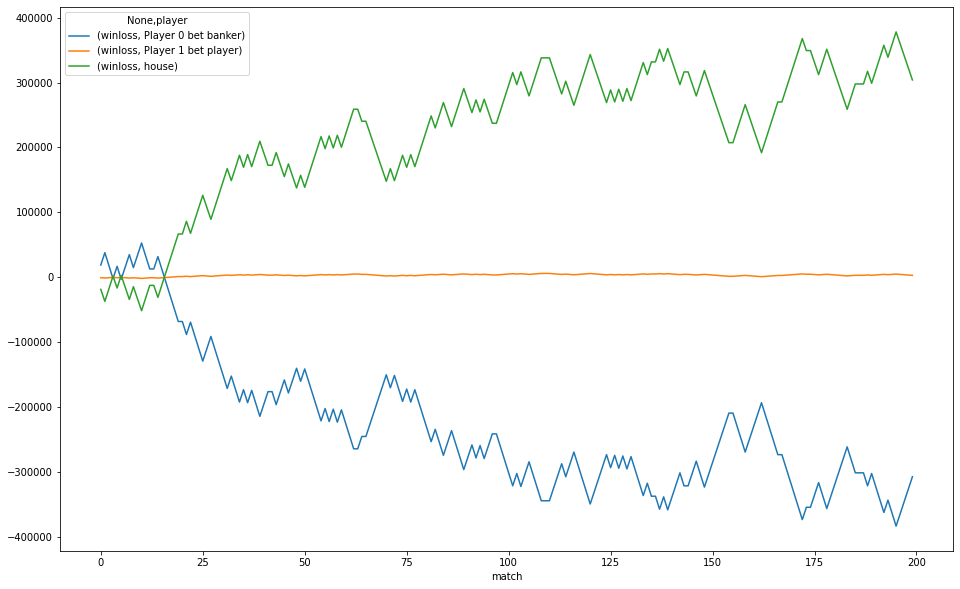

200


result
player    0.490
banker    0.435
tie       0.075
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -307000.0               3050.0  303950.0


player
Player 0 bet banker   -383000.0
Player 1 bet player     -1600.0
house                  -51400.0
dtype: float64


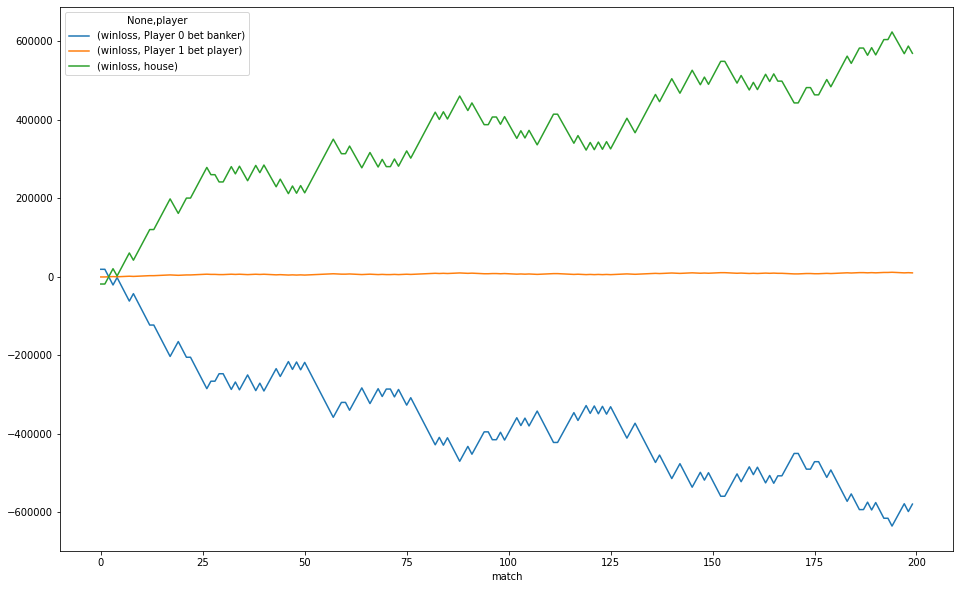

200


result
player    0.520
banker    0.395
tie       0.085
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -579000.0               9900.0  569100.0


player
Player 0 bet banker   -635000.0
Player 1 bet player      -500.0
house                  -18500.0
dtype: float64


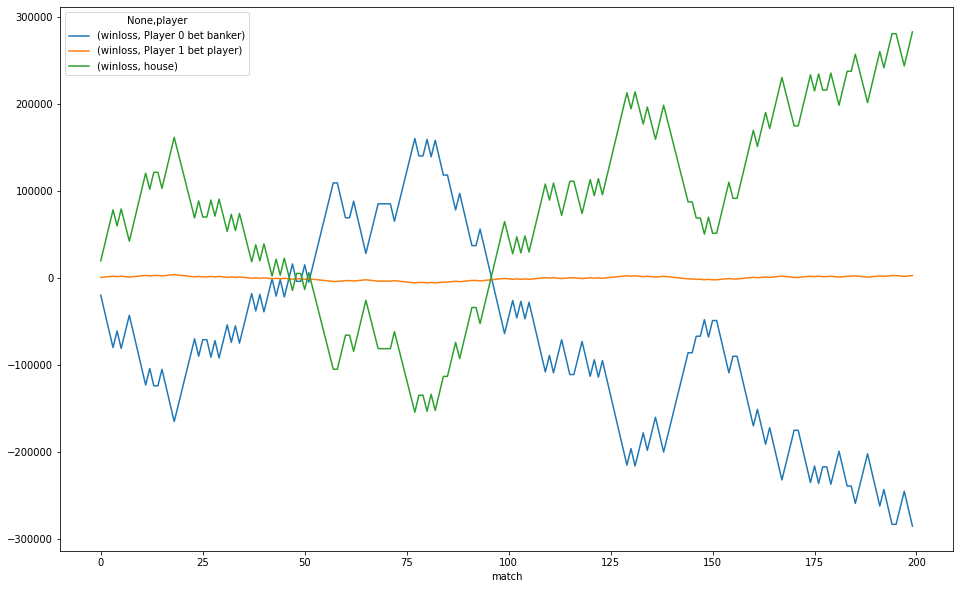

200


result
player    0.475
banker    0.425
tie       0.100
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -285000.0               2625.0  282375.0


player
Player 0 bet banker   -285000.0
Player 1 bet player     -5800.0
house                 -154250.0
dtype: float64


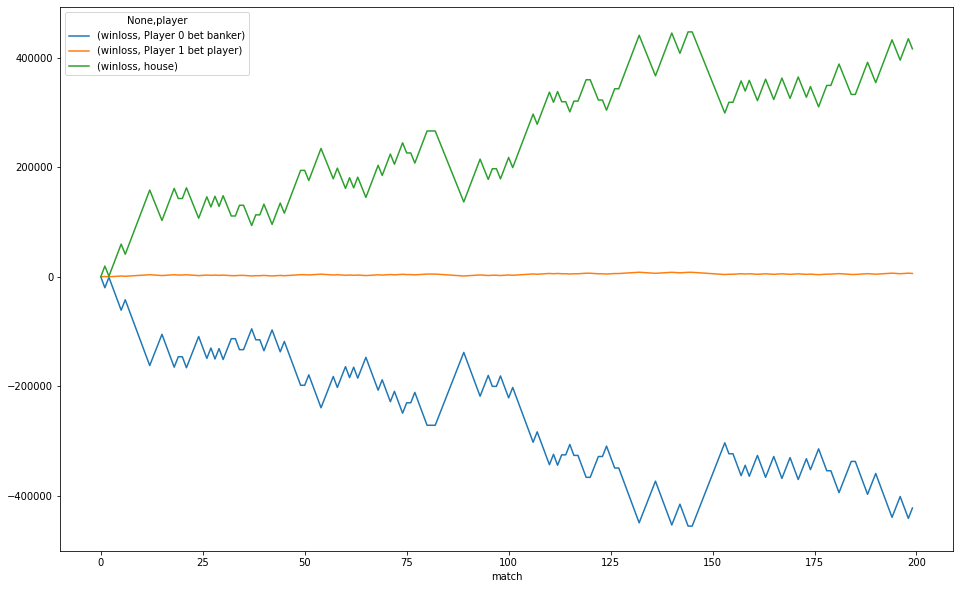

200


result
player    0.495
banker    0.410
tie       0.095
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -422000.0               6025.0  415975.0


player
Player 0 bet banker   -455000.0
Player 1 bet player       -25.0
house                       0.0
dtype: float64


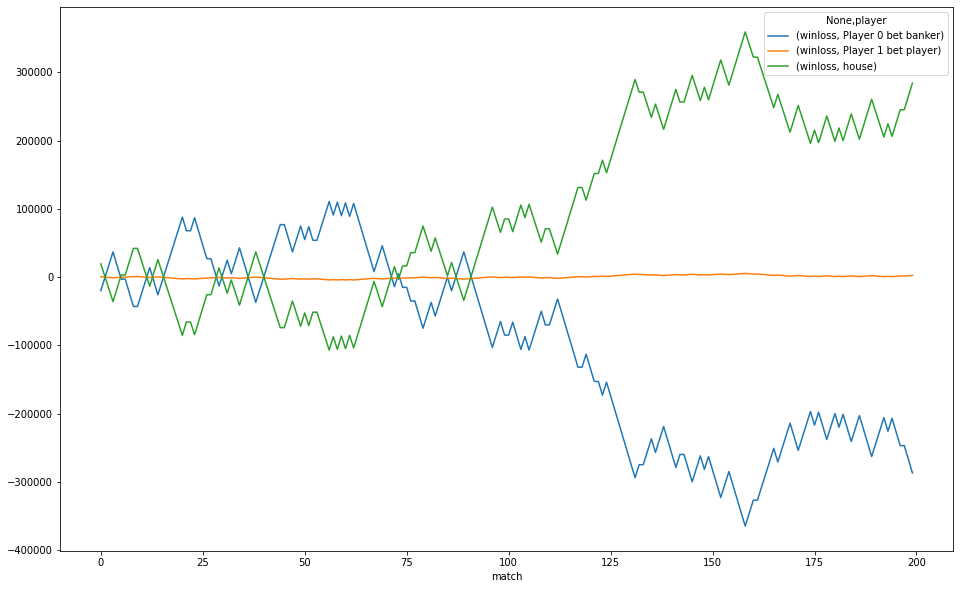

200


result
player    0.485
banker    0.435
tie       0.080
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -287000.0               2575.0  284425.0


player
Player 0 bet banker   -365000.0
Player 1 bet player     -4125.0
house                 -106950.0
dtype: float64


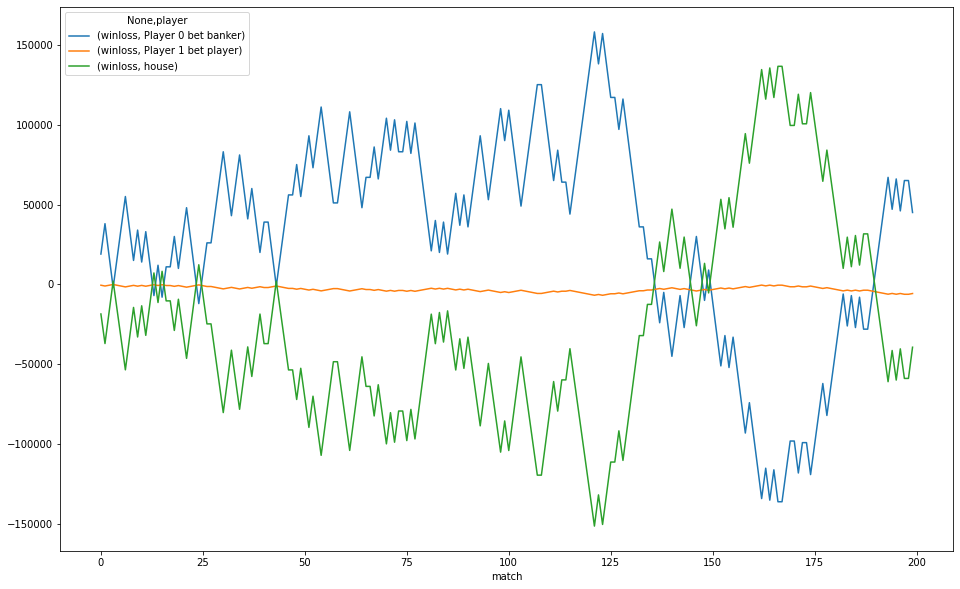

200


result
banker    0.475
player    0.440
tie       0.085
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                 45000.0              -5700.0 -39300.0


player
Player 0 bet banker   -136000.0
Player 1 bet player     -6800.0
house                 -151225.0
dtype: float64


In [3]:
# Test case 1
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# Conclusion
# * win-loss seems random
num_test = 10
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 1 - Two player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


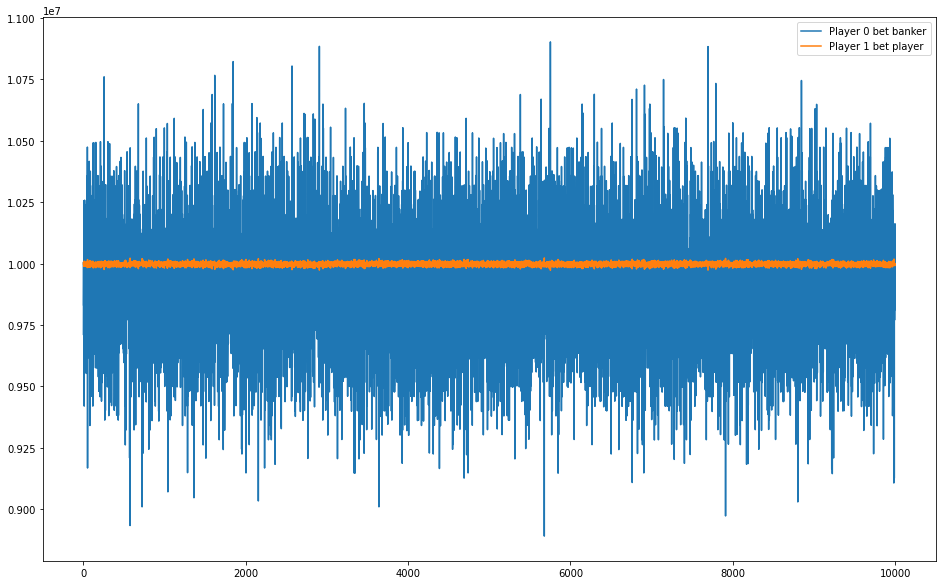

Player 0 bet banker  Player 1 bet player
count         1.000000e+04         1.000000e+04
mean          9.910489e+06         9.997636e+06
std           2.616619e+05         6.542569e+03
min           8.891000e+06         9.972825e+06
25%           9.731000e+06         9.993250e+06
50%           9.909000e+06         9.997675e+06
75%           1.008500e+07         1.000210e+07
max           1.090200e+07         1.002298e+07

In [4]:
# Test case 2
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# * increase the sample to very large to see if there is any pattern
num_test = 10 * 1000
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 2 - Two player different bet amount large samples:</h1>'))
playerWinLoss = []
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    test_result = {}
    for i in player:
        test_result[player[i].name] = player[i].balance
    playerWinLoss.append(test_result)
df = pd.DataFrame.from_dict(playerWinLoss)
df.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
df.describe()


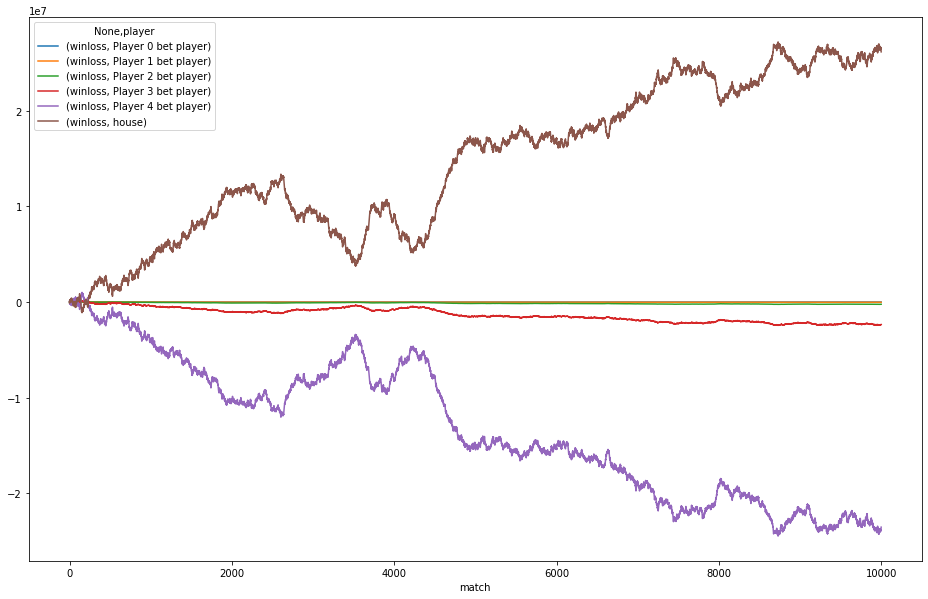

10000


result
banker    0.4608
player    0.4603
tie       0.0789
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2351.5             -23515.0            -235150.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2351500.0          -23515000.0  26127516.5  


player
Player 0 bet player       -2445.0
Player 1 bet player      -24450.0
Player 2 bet player     -244500.0
Player 3 bet player    -2445000.0
Player 4 bet player   -24450000.0
house                  -1116655.5
dtype: float64


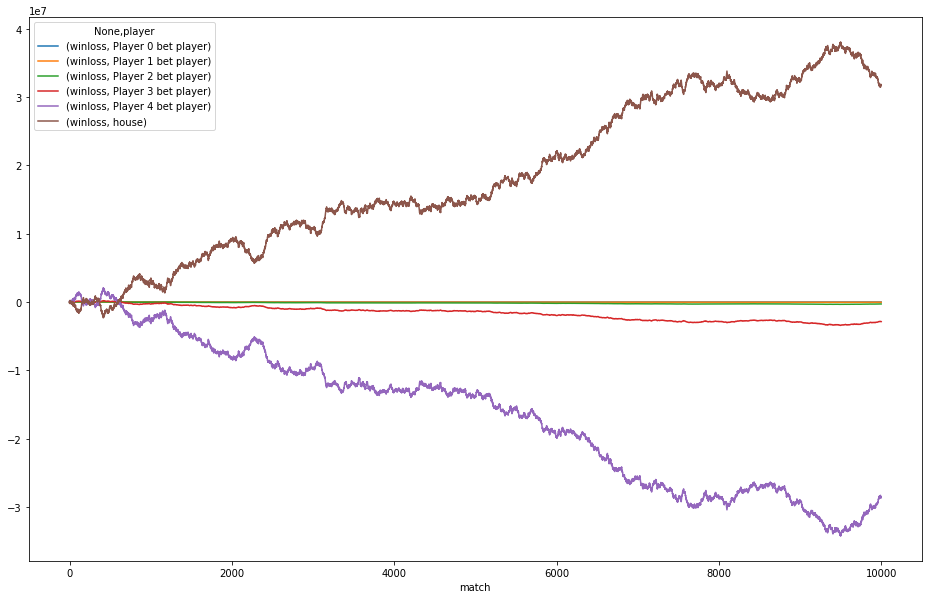

10000


result
banker    0.4644
player    0.4587
tie       0.0769
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2863.5             -28635.0            -286350.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2863500.0          -28635000.0  31816348.5  


player
Player 0 bet player       -3429.5
Player 1 bet player      -34295.0
Player 2 bet player     -342950.0
Player 3 bet player    -3429500.0
Player 4 bet player   -34295000.0
house                  -2322199.0
dtype: float64


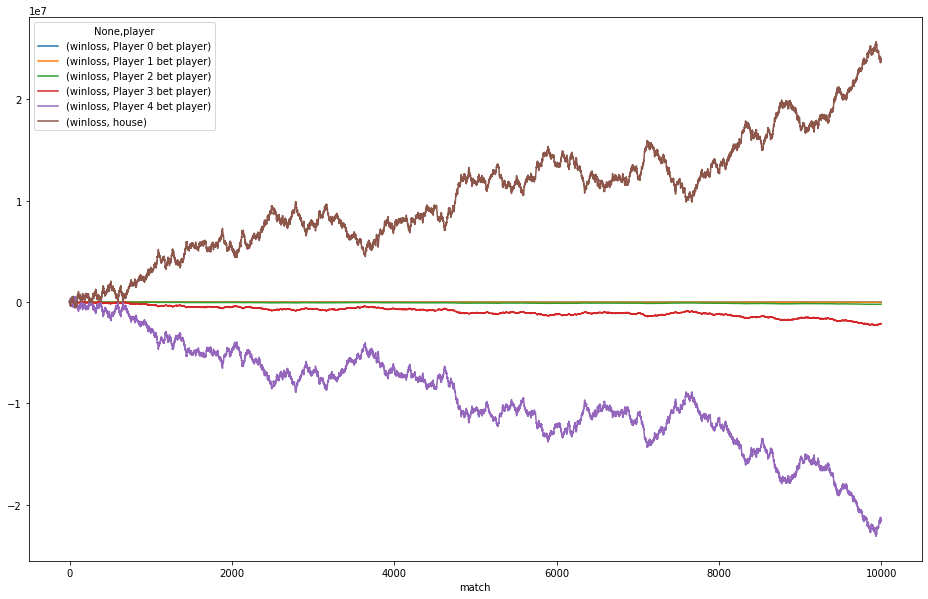

10000


result
player    0.4594
banker    0.4580
tie       0.0826
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2157.0             -21570.0            -215700.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2157000.0          -21570000.0  23966427.0  


player
Player 0 bet player       -2309.5
Player 1 bet player      -23095.0
Player 2 bet player     -230950.0
Player 3 bet player    -2309500.0
Player 4 bet player   -23095000.0
house                   -583327.5
dtype: float64


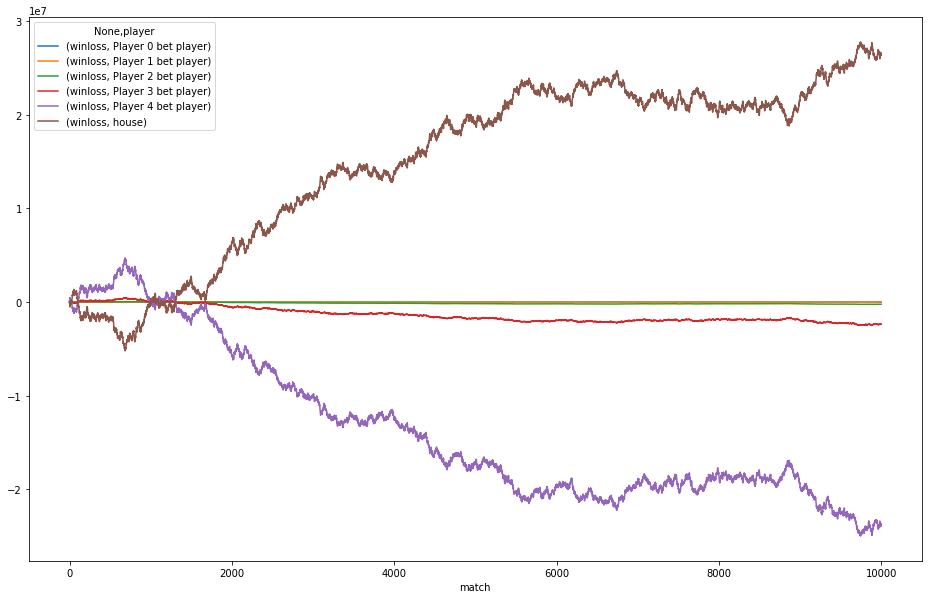

10000


result
banker    0.4606
player    0.4599
tie       0.0795
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2369.5             -23695.0            -236950.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2369500.0          -23695000.0  26327514.5  


player
Player 0 bet player       -2497.5
Player 1 bet player      -24975.0
Player 2 bet player     -249750.0
Player 3 bet player    -2497500.0
Player 4 bet player   -24975000.0
house                  -5194392.5
dtype: float64


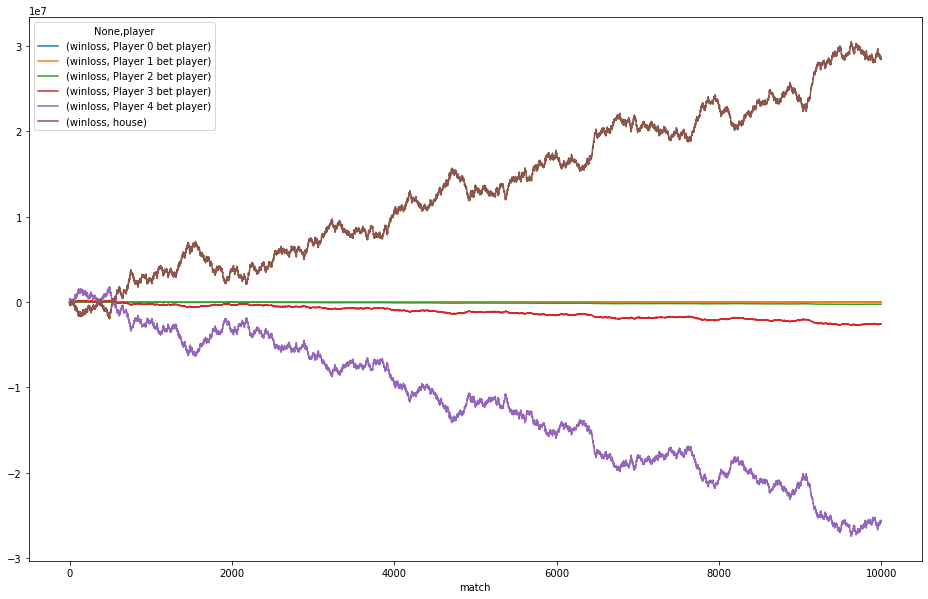

10000


result
banker    0.4614
player    0.4587
tie       0.0799
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2563.5             -25635.0            -256350.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2563500.0          -25635000.0  28483048.5  


player
Player 0 bet player       -2741.0
Player 1 bet player      -27410.0
Player 2 bet player     -274100.0
Player 3 bet player    -2741000.0
Player 4 bet player   -27410000.0
house                  -1983313.5
dtype: float64


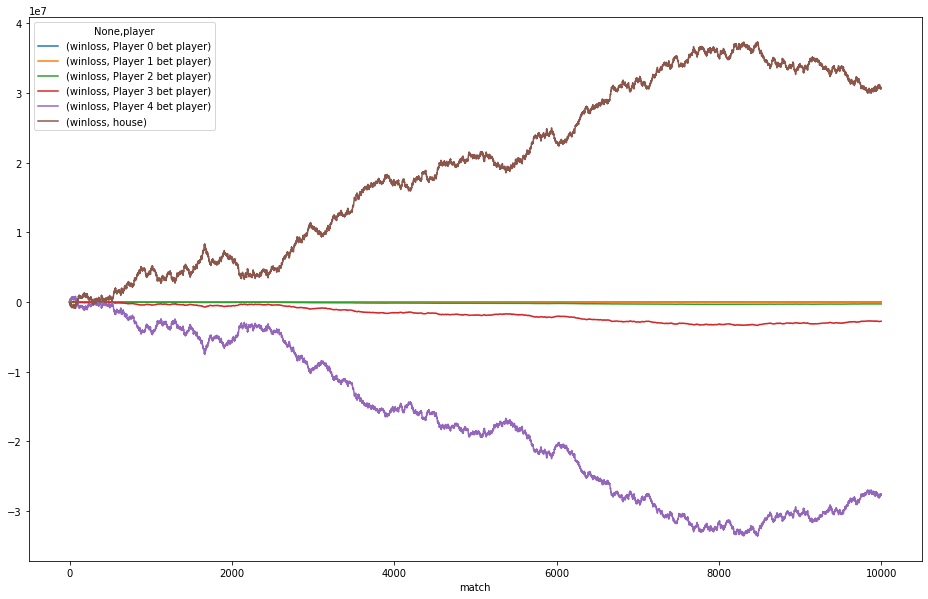

10000


result
banker    0.4602
player    0.4553
tie       0.0845
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2766.5             -27665.0            -276650.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2766500.0          -27665000.0  30738581.5  


player
Player 0 bet player       -3362.0
Player 1 bet player      -33620.0
Player 2 bet player     -336200.0
Player 3 bet player    -3362000.0
Player 4 bet player   -33620000.0
house                   -899991.0
dtype: float64


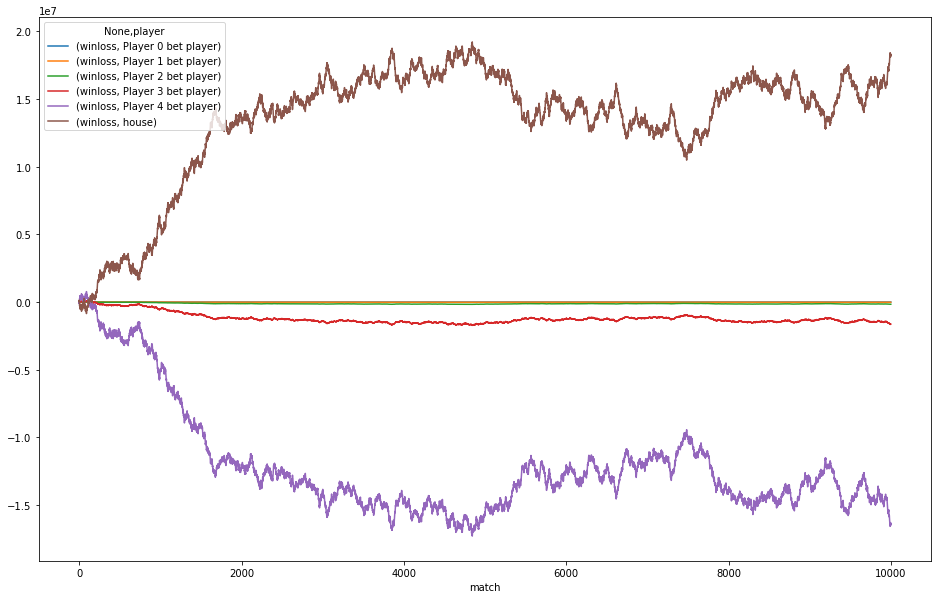

10000


result
player    0.4642
banker    0.4574
tie       0.0784
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1641.0             -16410.0            -164100.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1641000.0          -16410000.0  18233151.0  


player
Player 0 bet player       -1730.5
Player 1 bet player      -17305.0
Player 2 bet player     -173050.0
Player 3 bet player    -1730500.0
Player 4 bet player   -17305000.0
house                   -855547.0
dtype: float64


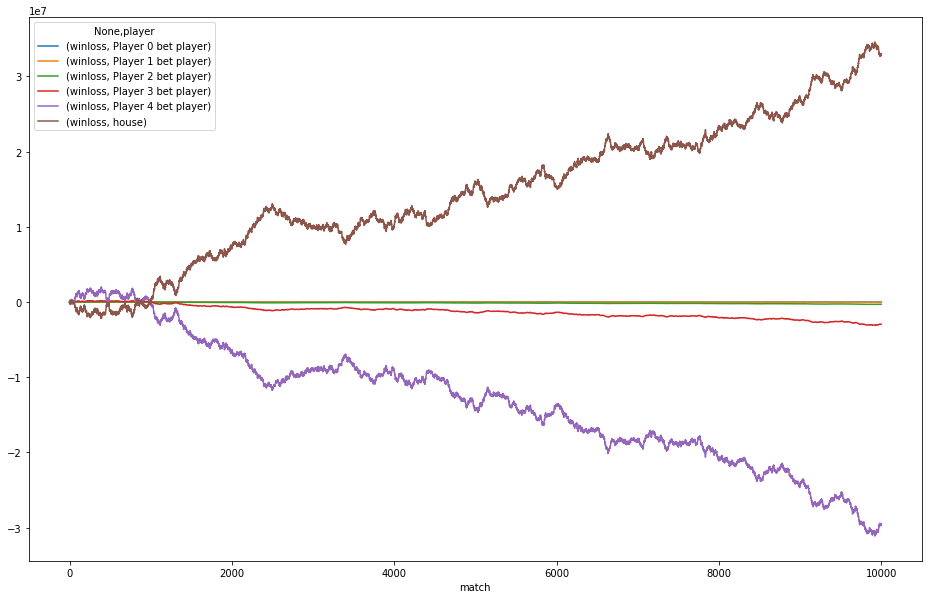

10000


result
banker    0.4653
player    0.4586
tie       0.0761
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2963.0             -29630.0            -296300.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2963000.0          -29630000.0  32921893.0  


player
Player 0 bet player       -3111.0
Player 1 bet player      -31110.0
Player 2 bet player     -311100.0
Player 3 bet player    -3111000.0
Player 4 bet player   -31110000.0
house                  -2183311.5
dtype: float64


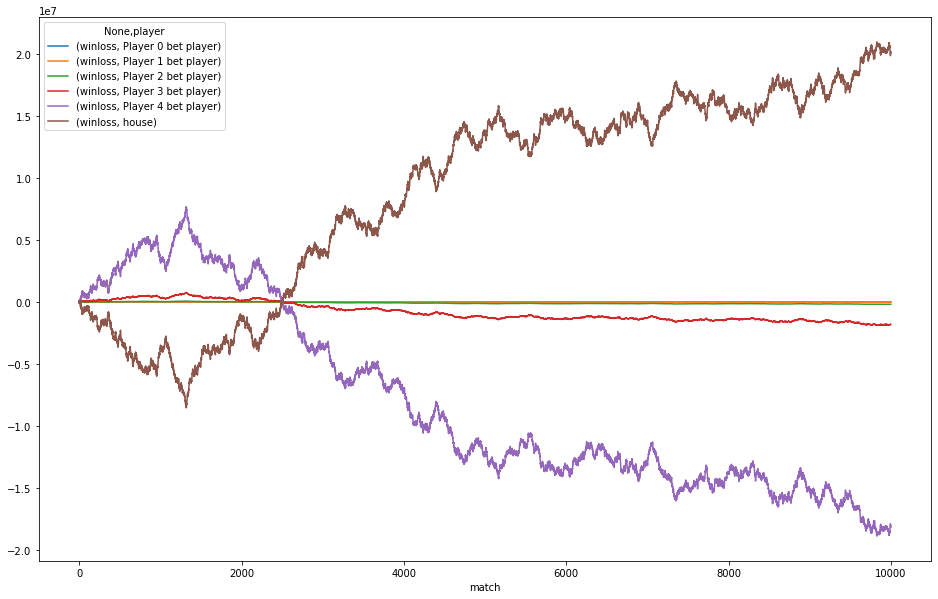

10000


result
player    0.462
banker    0.457
tie       0.081
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1810.0             -18100.0            -181000.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1810000.0          -18100000.0  20110910.0  


player
Player 0 bet player       -1889.0
Player 1 bet player      -18890.0
Player 2 bet player     -188900.0
Player 3 bet player    -1889000.0
Player 4 bet player   -18890000.0
house                  -8527692.5
dtype: float64


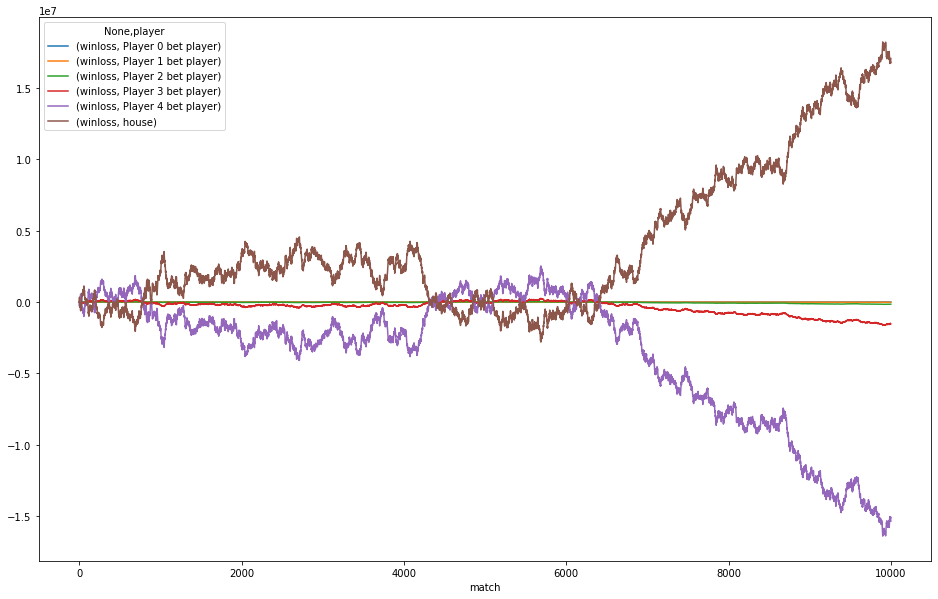

10000


result
player    0.4631
banker    0.4553
tie       0.0816
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1535.5             -15355.0            -153550.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1535500.0          -15355000.0  17060940.5  


player
Player 0 bet player       -1639.5
Player 1 bet player      -16395.0
Player 2 bet player     -163950.0
Player 3 bet player    -1639500.0
Player 4 bet player   -16395000.0
house                  -2805527.5
dtype: float64


In [5]:
# Test case 3
# * define many players and their bet hand and amount
# * each player's bet amount is different in order to show their relationship
# Conclusion
num_test = 10
num_matches = 10000
bets = [
    {'bet': BET_PLAYER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 100},
    {'bet': BET_PLAYER, 'amount': 1000},
    {'bet': BET_PLAYER, 'amount': 10000},
    {'bet': BET_PLAYER, 'amount': 100000},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 3 - Different player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


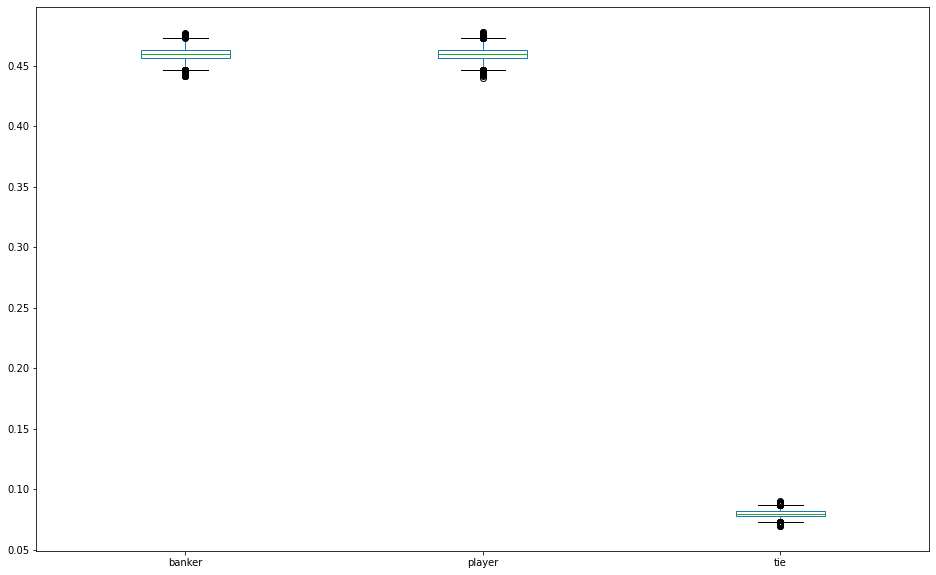

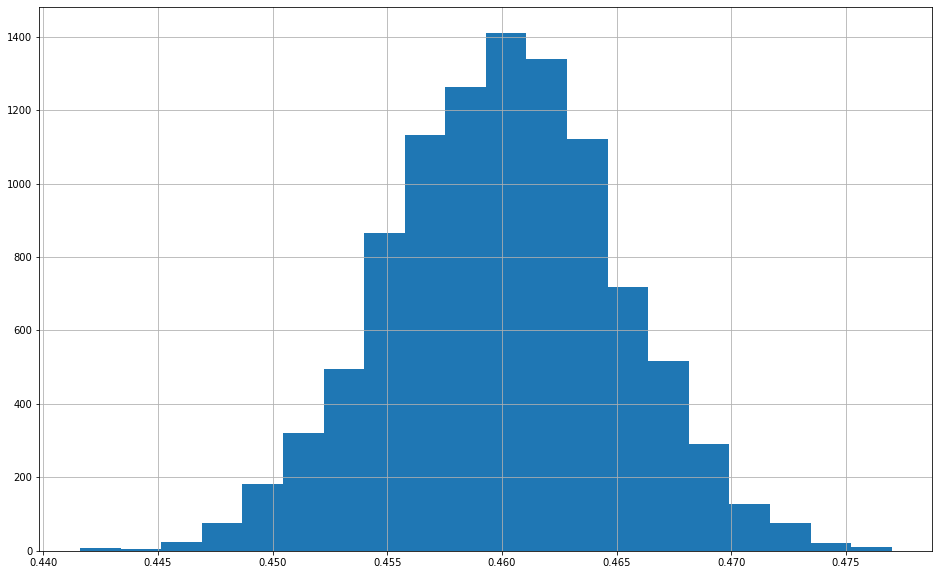

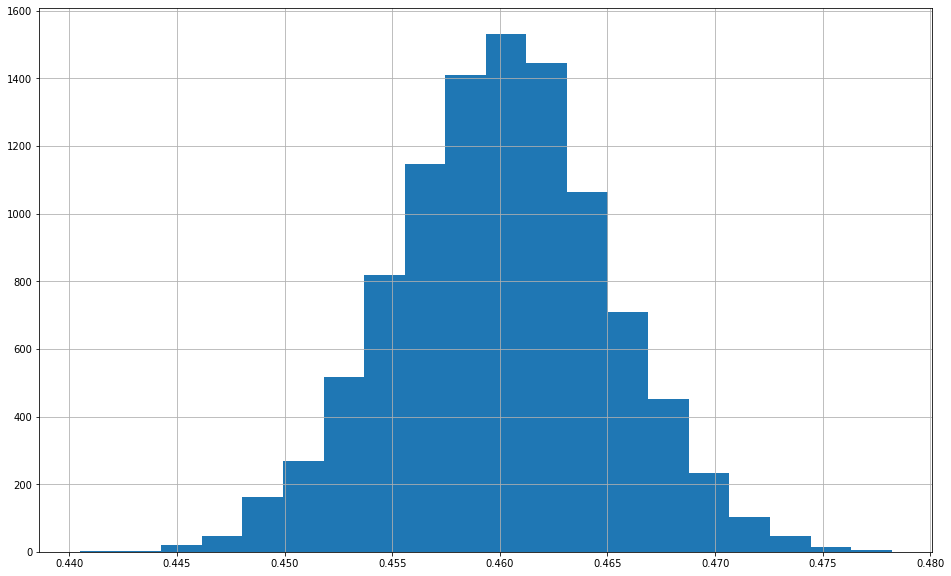

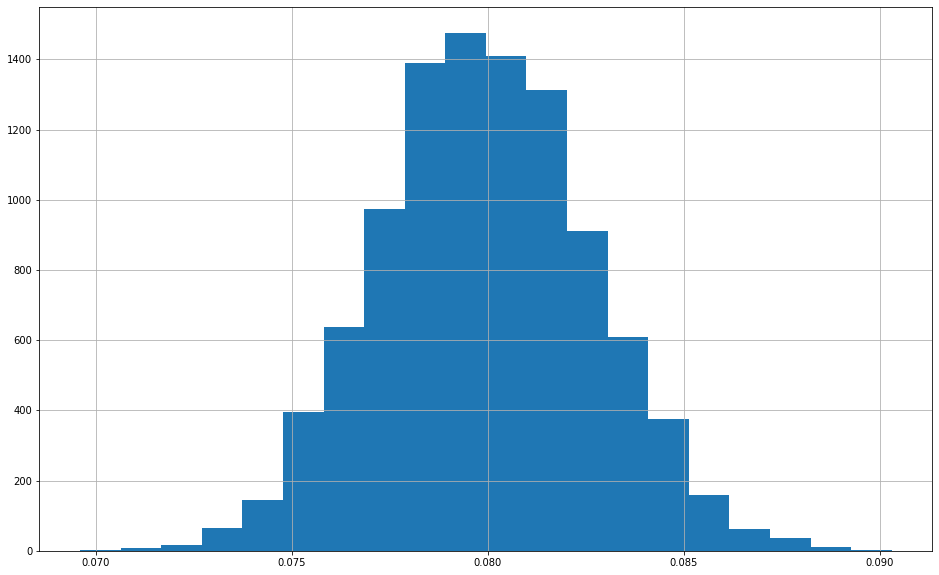

             banker        player           tie
count  10000.000000  10000.000000  10000.000000
mean       0.460038      0.460044      0.079918
std        0.005004      0.004982      0.002697
min        0.441600      0.440500      0.069600
25%        0.456700      0.456700      0.078100
50%        0.460100      0.460100      0.079900
75%        0.463400      0.463300      0.081700
max        0.477000      0.478200      0.090300


In [6]:
# Test case 4
# * test the error rate with defined sample size
num_test = 10 * 1000
num_matches = 10 * 1000
bets = [
    {'bet': BET_BANKER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 10},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 4 - Sample size variation:</h1>'))
display(HTML('<p>Number of test: {0}</p>'.format(num_test)))
display(HTML('<p>Samples size: {0}</p>'.format(num_matches)))
results_df = pd.DataFrame()
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    results = []
    for i in range(num_matches):
        result = baccarat.deal()
        results.append(result)
    result_df = pd.DataFrame(data=results, columns=['result'])
    result_value_counts = result_df['result'].value_counts(normalize=True)
    results_df = results_df.append(result_value_counts, ignore_index=True)
results_df.plot.box(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
results_df[BET_BANKER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_PLAYER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_TIE].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
print(results_df.describe())


In [7]:
display(HTML('<h1>All tests finished.</h1>'))
